# Юсипов Артур ИУ5-24М

#### Короткое описание датасета
> Прокат велосипедов в Лондоне.

Данные в датасете имеют информацию о погодных условиях, дате/времени и количестве велосипедов взятых на прокат в Лондоне за несколько лет

#### Описание анализируемых данных
Год — показывает год, когда велосипед взят в аренду.

Месяц — показывает месяц, когда велосипед взят в аренду.

День — показывает день, когда велосипед взят в аренду.

Время — показывает время в часах, когда велосипед взят в аренду.

Количество велосипедов — отражает количество велосипедов, которые были взяты напрокат.

Температура воздуха  — отражает температуру воздуха в градусах Цельсия.

Ощущаемая температура — отражает температуру воздуха, ощущаемую человеком в градусах Цельсия.

Влажность воздуха — показывает текущую влажность воздуха, выраженную в процентах.

Скорость ветра — показывает скорость ветра в километрах в час.

Код погоды — 1 - Ясно; 2 - Кучевые облака; 3 – Перистые облака 4 – Облачно; 7 - Дождь / Легкий дождь; 10 - Дождь с грозой; 26 – Снегопад; 94 - Замораживание тумана

Праздничный ли день — отражается в датасете в качестве 0/1.

Выходной ли день — отражается в датасете в качестве 0/1.

Сезон — 0-весна; 1-лето; 2-осень; 3-зима.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import sklearn

In [5]:
data = pd.read_csv("london_merged.csv")
%matplotlib inline

In [15]:
data['year'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).year))
data['month'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).month))
data['day'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).day))
data['hour'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).hour))

data['year_month'] = pd.DataFrame(data['timestamp'].apply(lambda x: str(pd.to_datetime(x).year)+'_'+str(pd.to_datetime(x).month) ))


In [164]:
data.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,year_month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,2015_1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,2015_1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,2015_1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,2015_1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,2015_1
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015,1,4,5,2015_1
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,4,6,2015_1
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,4,7,2015_1
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015,1,4,8,2015_1
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,2015,1,4,9,2015_1


In [8]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('timestamp', ('object', 0)),
 ('cnt', ('int64', 0)),
 ('t1', ('float64', 0)),
 ('t2', ('float64', 0)),
 ('hum', ('float64', 0)),
 ('wind_speed', ('float64', 0)),
 ('weather_code', ('float64', 0)),
 ('is_holiday', ('float64', 0)),
 ('is_weekend', ('float64', 0)),
 ('season', ('float64', 0)),
 ('year', ('int64', 0)),
 ('month', ('int64', 0)),
 ('day', ('int64', 0)),
 ('hour', ('int64', 0))]

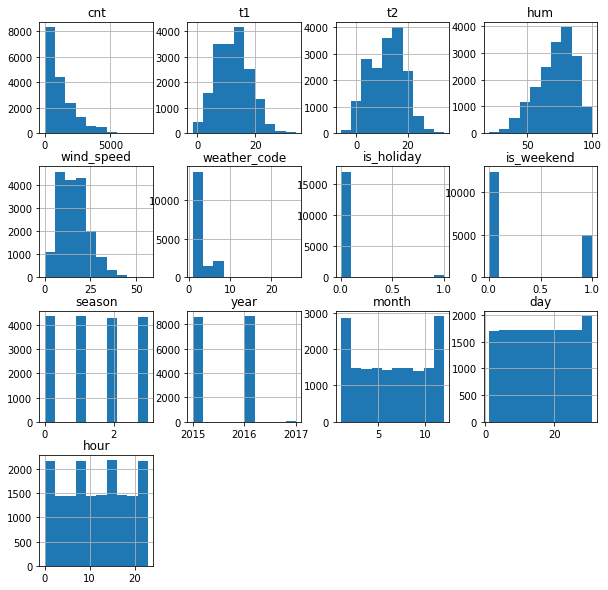

In [10]:
data.hist(figsize=(10,10));

## ШАГ 1

Спрос проката велосипедов в разные месяцы в течении двух лет

In [37]:
cnt_avg = []
year_month_list = data['year_month'].unique()
for year_month in year_month_list:
    cnt_avg.append(int(data[data['year_month']==year_month]['cnt'].mean()))  

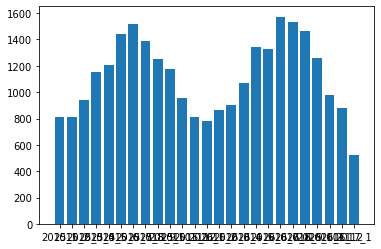

In [57]:
height = cnt_avg
bars = year_month_list
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

# figsize в данном случае не работает, не ясно как поменять масштаб.

Как видно из графика выше, спрос на прокат велосипедов варьируется в каждом месяце, но можно заметить очевидную закономерность, что чем ближе месяц к лету, тем выше спрос. Зимой же спрос самый маленький (примерно в 2 раза меньше чем летом). Также из графика выше можно сделать вывод, что актуальность велопроката не упала за год, а даже наоборот возросла. В 2016 году велопрокатом пользовались немного больше чем в 2015 году, что говорит об успешном бизнесе.
 
---

Для наглядности посмотрим на схожий график, который описывает среднюю температуру за месяц за эти два года.

In [60]:
# Средняя температура в каждом месяце года
t1_avg = []
year_month_list = data['year_month'].unique()
for year_month in year_month_list:
    t1_avg.append(data[data['year_month']==year_month]['t1'].mean())


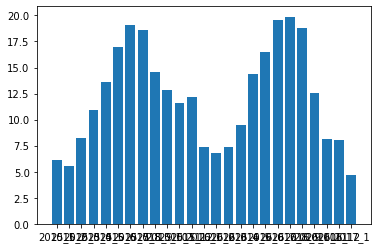

In [62]:
# Температура

height = t1_avg
bars = year_month_list
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()


И последних двух графиков можно сделать однозначный вывод, что температура очень сильно влияет на то сколько велосипедов будет взято на прокат.

# ШАГ 2

Но в Датасете даны два столбца: температура воздуха и ощущаемая температура.
Необходимо понять какое из этих значение больше влияет на количество велосипедов взятых в прокат. Это может помочь улучшить предсказание целевого параметра.
Перед анализом, я предполагаю, что ощущаемая температура будет больше влиять на целевой признак.

In [68]:
# Default heatmap
data.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,0.000542


<AxesSubplot:>

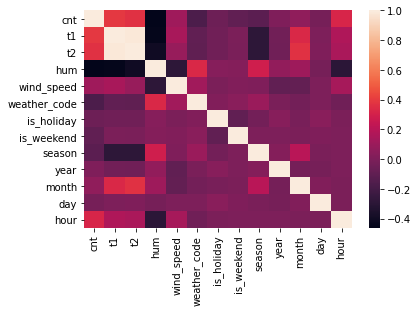

In [69]:
sns.heatmap(data.corr())

В данном случае, как мы видим, сильно большой между ощущаемой температурой и температурой воздуха нет. На тепловой карте разницы вообще не видно, но значение корреляции этих фичей для целевого признака будут 0.388 (для температуры воздуха и количеством велосипедов) и 0.369 (для ощущаемой температуры и количеством велосипедов). Из этого следует, что если в будущем необходимо будет обучать модель на определение количества велосипедов в прокате, то лучше использовать абсолютное значение температуры воздуха, а не ощущаемая температура.

# ШАГ 3

Так как корреляция между влажностью и целевым признаком довольно высока (-0.46), то проводим исследование на то как влажность зависит от остальных признаков. 

<AxesSubplot:>

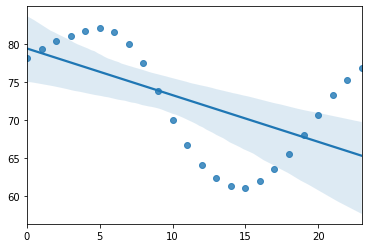

In [99]:
hum_avg = []
hour_list = data['hour'].unique()
for hour in hour_list:
    hum_avg.append(data[data['hour']==hour]['hum'].mean())

sns.regplot(x=hour_list, y=hum_avg)

Зависимость от времени суток есть, и эта зависимость достаточно явно выражена, но, возможно, на влажность действует как время суток, так и температура воздуха. Построим диграмму для трёх параметров.

In [83]:
hum_avg = []
t1_avg = []
hour_list = data['hour'].unique()
for hour in hour_list:
    hum_avg.append(data[data['hour']==hour]['hum'].mean())
    t1_avg.append(data[data['hour']==hour]['t1'].mean())  

In [92]:
df_for_scatterplot = pd.DataFrame(list(zip(hum_avg, t1_avg, hour_list)), columns =['hum_avg', 't1_avg', 'hour'])
df_for_scatterplot

,hum_avg,t1_avg,hour
0,78.138467,11.239641,0
1,79.301796,10.976289,1
2,80.303745,10.741331,2
3,81.077670,10.531900,3
4,81.670596,10.357143,4
5,82.106103,10.253121,5
6,81.597107,10.340220,6
7,80.008953,10.734848,7
8,77.421271,11.357044,8
9,73.858322,12.198762,9


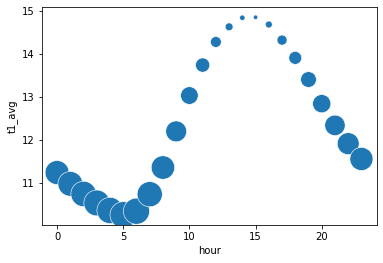

In [98]:
sns.scatterplot(data = df_for_scatterplot ,x='hour', y='t1_avg', size='hum_avg', legend=False, sizes=(20, 700))
plt.show()

Как видно из диаграммы влажность ниже, чем выше температура (а температура повышается в дневной период при солнце с 10 до 20 часов). Отсюда можно сделать вывод, что количество велосипедов в прокате логично повышается в дневное время, как раз в это время понижается влажность и повышается температура, что является более благоприятной средой для катания на велосипеде.

# ШАГ 4

Предположим, что в праздничные дни в прокат берут велосипедов намного больше, проанализируем этот случай

In [127]:

data_is_holiday = data[data['is_holiday']==1]
data_not_holiday = data[data['is_holiday']==0]
# всего 384/24 = 16 праздничных дня за 2 года
data_is_holiday

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,year_month
2129,2015-04-03 00:00:00,279,8.0,6.0,82.0,10.0,7.0,1.0,0.0,0.0,2015,4,3,0,2015_4
2130,2015-04-03 01:00:00,174,8.0,5.5,79.0,14.0,7.0,1.0,0.0,0.0,2015,4,3,1,2015_4
2131,2015-04-03 02:00:00,89,7.5,5.5,84.5,12.0,7.0,1.0,0.0,0.0,2015,4,3,2,2015_4
2132,2015-04-03 03:00:00,61,7.0,5.0,87.0,11.0,7.0,1.0,0.0,0.0,2015,4,3,3,2015_4
2133,2015-04-03 04:00:00,46,7.0,6.0,93.0,6.0,7.0,1.0,0.0,0.0,2015,4,3,4,2015_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17385,2017-01-02 19:00:00,433,3.0,0.0,81.0,11.0,1.0,1.0,0.0,3.0,2017,1,2,19,2017_1
17386,2017-01-02 20:00:00,334,3.0,0.0,75.0,13.0,1.0,1.0,0.0,3.0,2017,1,2,20,2017_1
17387,2017-01-02 21:00:00,233,2.5,-0.5,78.0,11.0,1.0,1.0,0.0,3.0,2017,1,2,21,2017_1
17388,2017-01-02 22:00:00,201,2.0,-1.0,81.0,10.0,1.0,1.0,0.0,3.0,2017,1,2,22,2017_1


In [131]:
cnt_avg_is_holiday = []
cnt_avg_not_holiday = []
hour_list = data['hour'].unique()
for hour in hour_list:
    cnt_avg_is_holiday.append(int(data_is_holiday[data_is_holiday['hour']==hour]['cnt'].mean()))
    
for hour in hour_list:
    cnt_avg_not_holiday.append(int(data_not_holiday[data_not_holiday['hour']==hour]['cnt'].mean()))

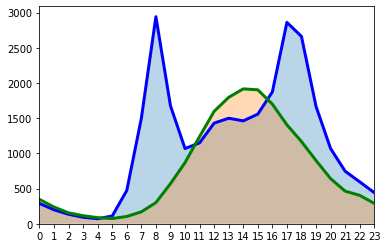

In [163]:
fig, ax = plt.subplots()
ax.plot(hour_list, cnt_avg_not_holiday, color='blue', lw=3)
ax.plot(hour_list, cnt_avg_is_holiday, color='green', lw=3)
ax.fill_between(hour_list, 0, cnt_avg_not_holiday, alpha=.3)
ax.fill_between(hour_list, 0, cnt_avg_is_holiday, alpha=.3)
ax.set(xlim=(0, len(hour_list) - 1), ylim=(0, None), xticks=hour_list)

# Show the graph
plt.show()

Диаграмма выше показывает количество взятых велосипедов в зависимости от времени. Синий график - количество велосипедов взятых в обычные дни. Зеленый график - количество велосипедов взятых в празднчиные дни.
Как вывод: в обычные (в основном будние) дни люди берут на прокат велосипеды утром и вечером (вероятно едут на работу и с работы). В праздничные дни пик велопроката в 14-15 часов (но не сильно больше, чем в обычные дни), а утром и вечером мало кто пользуется велопрокатом.

# ШАГ 5

Теперь проведём анализ проката велосипедов относительно погодных условий.
Код погоды — 1 - Ясно; 2 - Кучевые облака; 3 – Перистые облака 4 – Облачно; 7 - Дождь / Легкий дождь; 10 - Дождь с грозой; 26 – Снегопад; 94 - Замораживание тумана.

In [187]:
avg_cnt_for_weather = []
codes = [1,2,3,4,7,10,26,94]
for code in codes:
    avg_cnt_for_weather.append(data[data['weather_code'] == code]['cnt'].mean())

In [188]:
print(avg_cnt_for_weather)
avg_cnt_for_weather.remove(np.NaN)

[1162.0889430894308, 1496.1774913237482, 1195.124471979724, 635.2308743169399, 712.9663708547408, 583.4285714285714, 250.85, nan]


<StemContainer object of 3 artists>

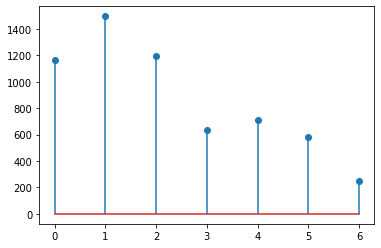

In [189]:
plt.stem(avg_cnt_for_weather)
# Где
# 0 - Ясно
# 1 - Кучевые облака
# 2 - Перистые облака
# 3 - Облачно
# 4 - Дождь
# 5 - Дождь с грозой
# 6 - Снегопад

Большинство предпочитают брать велосипеды во время небольших облаков (1 Кучевые облака), а не когда их совсем нет (0 Ясно). Возможно это связано с тем, что во время солнечных дней кататься не очень комфортно.
При облачной погоде (3 Облачно) количество людей, которые арендуют велосипед резко уменьшается. Дождь (4) и дождь с грозой (5) равносильны облачной погоде (примерно в 2 раза меньше чем при ясной или слабо облачной погоде)